## KDP 結晶の誘電率の周波数依存性

## Kramers–Kronig の関係式

電気感受率の実部と虚部は
$$
\begin{align*}
    \chi_2 &= -\frac{1}{\pi}\mathcal{P}\int_{-\infty}^{\infty} \frac{\chi_1(\omega')}{\omega'-\omega} d\omega'\\
    \chi_1 &=  \frac{1}{\pi}\mathcal{P}\int_{-\infty}^{\infty} \frac{\chi_2(\omega')}{\omega'-\omega} d\omega'
\end{align*}
$$
という関係がある。
これを Kramers-Kronig の関係式という。

この式はインパルス応答が常に正であるという条件を付けると実部は偶関数、
虚部は奇関数になるらしい。(TODO)

それを用いると
$$
\begin{align*}
    \chi_2 &= -\frac{2}{\pi}\mathcal{P}\int_{0}^{\infty} \frac{\omega \chi_1(\omega')}{\omega'^2-\omega^2} d\omega'\\
    \chi_1 &=  \frac{2}{\pi}\mathcal{P}\int_{0}^{\infty} \frac{\omega'\chi_2(\omega')}{\omega'^2-\omega^2} d\omega'
\end{align*}
$$
となるらしい。

測定データは実部のうちさらに一部分である。
Kramers-Kronig の関係式を使って解析するには

$$
\begin{align*}
    \chi_2
    &= -\frac{2}{\pi}\mathcal{P}\int_{0}^{\infty} \frac{\omega \chi_1(\omega')}{\omega'^2-\omega^2} d\omega'\\
    &= -\frac{2f}{\pi}\mathcal{P}\int_{0}^{f_{\mathrm{min}}} \frac{\chi_1(f')}{f'^2-f^2} df'
       -\frac{2f}{\pi}\mathcal{P}\int_{f_\mathrm{min}}^{f_{\mathrm{max}}} \frac{\chi_1(f')}{f'^2-f^2} df'
       -\frac{2f}{\pi}\mathcal{P}\int_{f_\mathrm{min}}^{\infty} \frac{\chi_1(f')}{f'^2-f^2} df'\\
\end{align*}
$$

というように測定データの部分とそれ以外の部分を考えなければならない。

まず測定データに関する積分については
$$
\chi_2(f_j)=-\frac{2f_j}{\pi}\mathcal{P}\int_{f_\mathrm{min}}^{f_{\mathrm{max}}} \frac{\chi_1(f')}{f'^2-f_j^2} df'
= -\frac{2f}{\pi}\sum_{i\neq j} \frac{\chi_1(f_i)}{f_i^2-f_j^2}(f_i-f_{i-1})
$$
とすればよい。

それ以外の場所の積分は電気感受率の値が変わらないので
$$
    -\frac{2}{\pi}\mathcal{P}\int_{0}^{f_{\mathrm{min}}} \frac{f \chi_1(f')}{f'^2-f^2} df' 
    = -\frac{\chi_1(f_{\mathrm{min}})}{\pi}\int_{0}^{f_{\mathrm{min}}} \Bigl(\frac{1}{f'-f}-\frac{1}{f'+f}\Bigl) df'
    = -\frac{\chi_1(f_{\mathrm{min}})}{\pi}\ln\Biggl(\frac{f-f_{\mathrm{min}}}{f+f_{\mathrm{min}}} \Biggr)
$$
$$
    -\frac{2}{\pi}\mathcal{P}\int_{f_{\mathrm{max}}}^{\infty} \frac{f \chi_1(f')}{f'^2-f^2} df' 
    = -\frac{\chi_1(f_{\mathrm{min}})}{\pi}\int_{f_{\mathrm{max}}}^{\infty} \Bigl(\frac{1}{f'-f}-\frac{1}{f'+f}\Bigl) df'
    =  \frac{\chi_1(f_{\mathrm{max}})}{\pi}\ln\Biggl(\frac{f_{\mathrm{max}}-f}{f_{\mathrm{max}}+f} \Biggr)
$$
となる。

## ライブラリ・関数

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def plot_epsilon1(x, y, legend):
    f = plt.figure(figsize=(12.8,4.8))
    ax1 = f.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = f.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax2.set_xlim(xmin, xmax)

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_1(\omega)$")
    ax2.set_xlabel("Frequency (kHz)")
    ax2.set_ylabel("Dielectric function $\epsilon_1(\omega)$")

    for i in [0, 1, 2, 3]:
        ax1.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax1.legend()
    ax1.hlines(0, xmin, xmax, colors="black")

    for i in [4, 5, 6, 7]:
        ax2.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax2.legend()
    ax2.hlines(0, xmin, xmax, colors="black")

    plt.show()

In [3]:
def plot_epsilon(x, y):
    f = plt.figure()
    ax1 = f.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    # ax1.set_xscale("log")

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_1(\omega)$")
    ax1.plot(x, y, label = "@ RT")
    ax1.hlines(0, xmin, xmax, colors="black")
    ax1.legend()

    plt.show()

In [4]:
def plot_epsilon2(x, y, legend):
    f = plt.figure(figsize=(12.8,4.8))
    ax1 = f.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = f.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax2.set_xlim(xmin, xmax)

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_2(\omega)$")
    ax2.set_xlabel("Frequency (kHz)")
    ax2.set_ylabel("Dielectric function $\epsilon_2(\omega)$")

    for i in [0, 1, 2, 3]:
        ax1.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax1.hlines(0, xmin, xmax, colors="black")
    ax1.legend()

    for i in [4, 5, 6, 7]:
        ax2.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax2.hlines(0, xmin, xmax, colors="black")
    ax2.legend()

    plt.show()

In [5]:
def plot_dissipation(x, y, legend):
    f = plt.figure(figsize=(12.8,4.8))
    ax1 = f.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = f.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax2.set_xlim(xmin, xmax)

    ax1.set_yscale("log")
    ax2.set_yscale("log")

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dissipation Factor")
    ax2.set_xlabel("Frequency (kHz)")
    ax2.set_ylabel("Dissipation Factor")

    for i in [0, 1, 2, 3]:
        ax1.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax1.legend()

    for i in [4, 5, 6, 7]:
        ax2.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax2.legend()

    plt.show()

In [6]:
def plot_ResFrequancy(x, y1, y2, y3):
    f = plt.figure()
    ax1 = f.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    ax1.set_xlim(110, 300)

    ax1.set_xlabel("Temperature (K)")
    ax1.set_ylabel("Resonance Frequency (kHz)")
    plt.scatter(x, y1)
    plt.plot(x, y1, label="method 1", color="tab:blue")
    plt.scatter(x, y2)
    plt.plot(x, y2, label="method 2", color="tab:orange")
    plt.scatter(x, y3)
    plt.plot(x, y3, label="method 3", color="tab:green")
    plt.legend()
    plt.show()

In [7]:
def calc_epsilon2(Frequency, Epsilon1):
    Epsilon2 = np.zeros_like(Epsilon1)
    for nfile in range(8):
        for i in range(999):
            for j in range(999):
                if (i == j): continue
                if(j == 0) : df = 0.05
                else : df = Frequency[nfile, j] - Frequency[nfile, j-1]
                #Cauchy の主値積分のところ
                Epsilon2[nfile, i] +=  (Epsilon1[nfile,j]-1)/(Frequency[nfile, j]**2 - Frequency[nfile,i]**2) * df
            Epsilon2[nfile, i] *= -2*Frequency[nfile,i] / np.pi
            Epsilon2[nfile, i] -= (Epsilon1[nfile,0]-1) / np.pi * np.log(
                (Frequency[nfile,i]-Frequency[nfile,0]+0.001)/(Frequency[nfile,i]+Frequency[nfile,0])) # +0.001 は発散しないようにするためのおまじない
            Epsilon2[nfile, i] += (Epsilon1[nfile,-1]-1) / np.pi * np.log(
                (Frequency[nfile,-1]-Frequency[nfile,i]+0.001)/(Frequency[nfile,-1]+Frequency[nfile,i])) # +0.001 は発散しないようにするためのおまじない
    return Epsilon2

## 測定データのインポート

In [8]:
# 標準コンデンサの容量(F)
C0 = 0.4678   / 0.142   * 8.85*10**(-14)
#    面積(cm2)  厚さ(cm)  誘電率(F/cm)

# 130 kHz - 190 kHz まで測定した温度
Temp = np.array([130, 140, 160, 180, 210, 240, 270, 295])
nfile = Temp.size

# グラフで表示する物理量 測定点が1000個あるはずだが最初の一つが読みこめないため 999 となってる
Frequency   = np.zeros((nfile, 999))
Epsilon1    = np.zeros((nfile, 999))
Epsilon2    = np.zeros((nfile, 999))
Dissipation = np.zeros((nfile, 999))

for i in range(nfile):
    df = pd.read_csv(f"2024_10_25/{Temp[i]}K.csv",
                     encoding = 'shift_jis',                          # shift_jis にしないと読み込めない
                     skiprows = 33,                                   # はじめ32行はヘッダー情報
                     usecols  = [2, 4, 5])                            # 2行目が周波数、4行目がCp、5行目がD

    Frequency[i]    = df.iloc[:,0].to_numpy() / 10**3 # kHz に換算
    Epsilon1[i]     = df.iloc[:,1].to_numpy() / C0
    Dissipation[i]  = df.iloc[:,2].to_numpy()


df = pd.read_csv("2024_10_25/a1k-1M_RT.csv",
                     encoding = 'shift_jis',                          # shift_jis にしないと読み込めない
                     skiprows = 33,                                   # はじめ32行はヘッダー情報
                     usecols  = [2, 4, 5])                            # 2行目が周波数、4行目がCp、5行目がD

Frequency_RT    = df.iloc[:,0].to_numpy() / 10**3 # kHz に換算
Epsilon1_RT     = df.iloc[:,1].to_numpy() / C0
Dissipation_RT  = df.iloc[:,2].to_numpy()

## 解析

In [9]:
# クラマスクローニッヒを使ったもの
Epsilon2 = calc_epsilon2(Frequency, Epsilon1)

In [10]:
# 損失係数から来たもの
EpD      = np.abs(Epsilon1 * Dissipation)

# 共鳴周波数を誘電率の虚部が最大となる周波数として求める
Frequency_res1 = np.array([])
Frequency_res2 = np.array([])
Frequency_res3 = np.array([])
for i in range(nfile):
    Frequency_res1 = np.append(Frequency_res1, Frequency[i][np.argmax(Epsilon2[i])])
    Frequency_res2 = np.append(Frequency_res2, Frequency[i][np.argmax(Dissipation[i])])
    Frequency_res3 = np.append(Frequency_res3, Frequency[i][np.argmax(EpD[i])])

## 出力

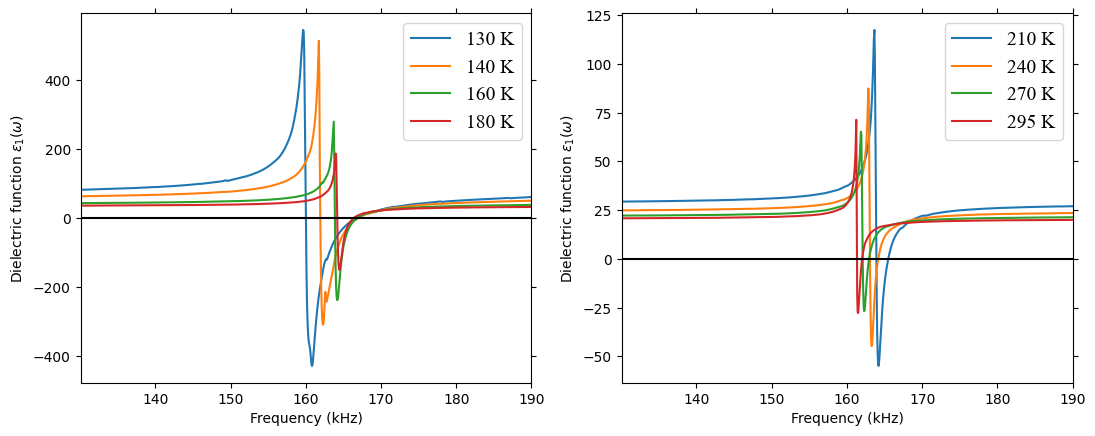

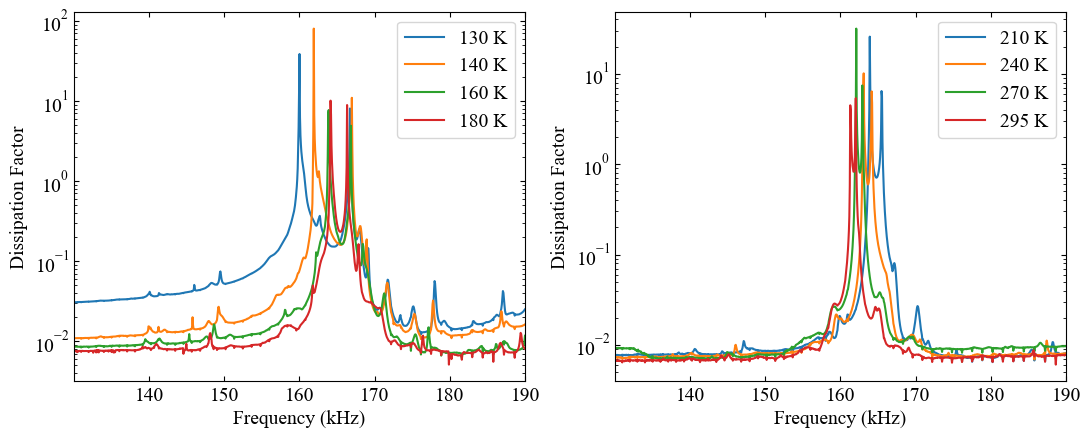

In [11]:
plot_epsilon1(Frequency, Epsilon1, Temp)
plot_dissipation(Frequency, Dissipation, Temp)

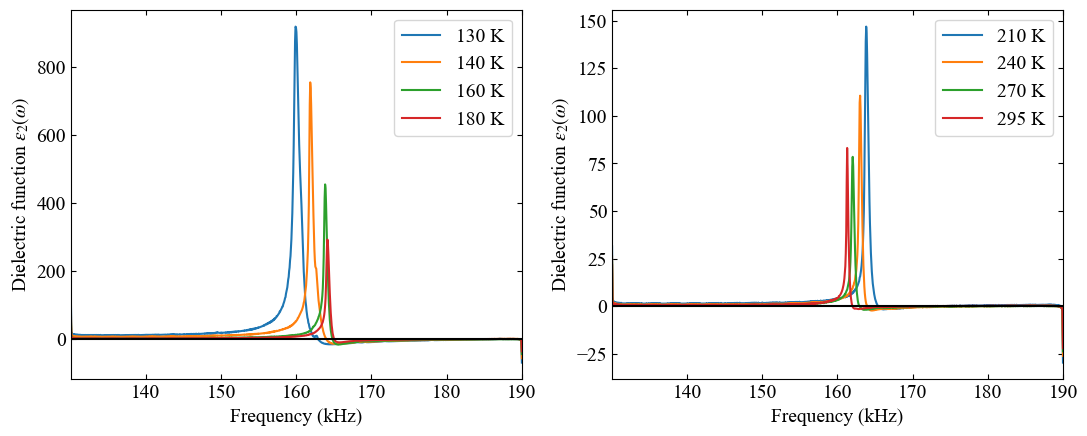

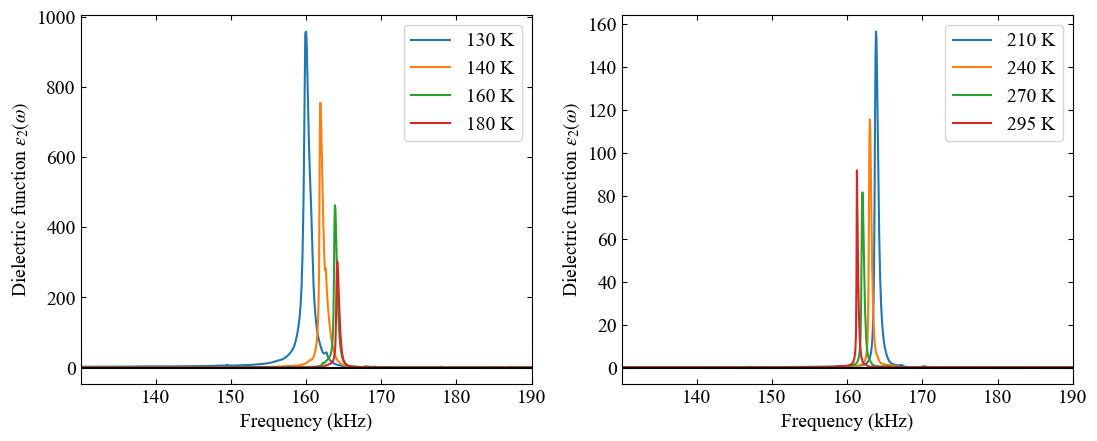

In [12]:
plot_epsilon2(Frequency, Epsilon2, Temp)
plot_epsilon2(Frequency, EpD, Temp)

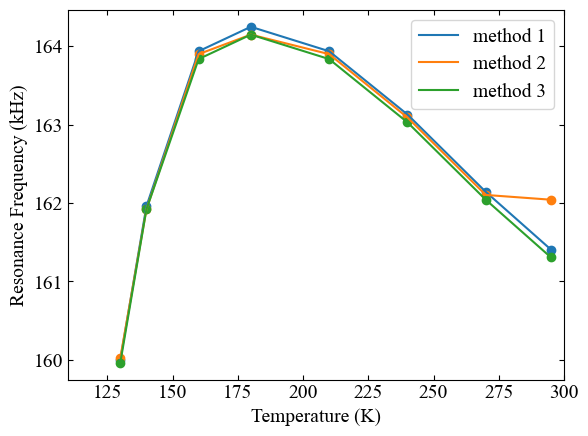

In [13]:
plot_ResFrequancy(Temp, Frequency_res1+0.1, Frequency_res2, Frequency_res3)

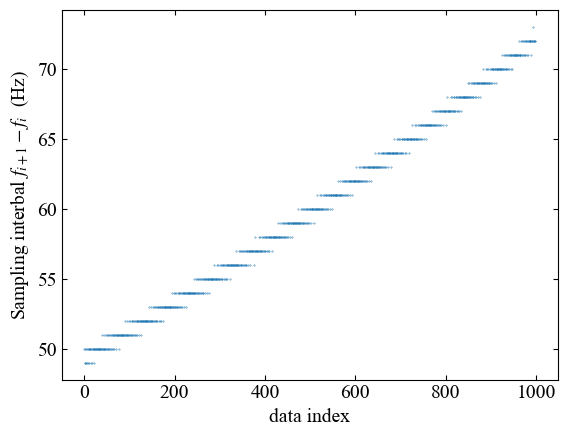

In [14]:
# 目盛を上下作用にセット
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# フォントの選択
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.xlabel("data index")
plt.ylabel("Sampling interbal $f_{i+1}-f_i$  (Hz) ")
plt.scatter(list(range(998)), (Frequency[1,1:]-Frequency[1,:-1])*1000, s=0.1)
plt.show()

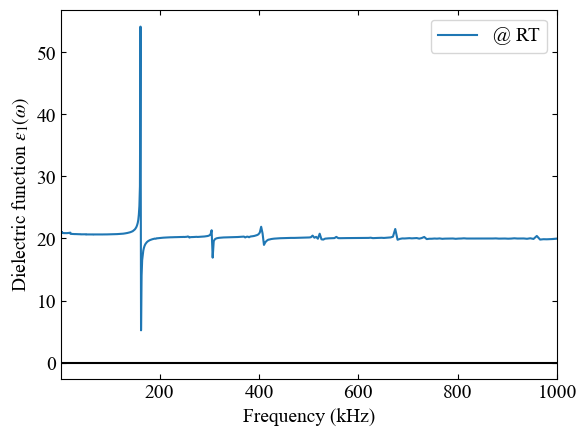

In [15]:
plot_epsilon(Frequency_RT, Epsilon1_RT)

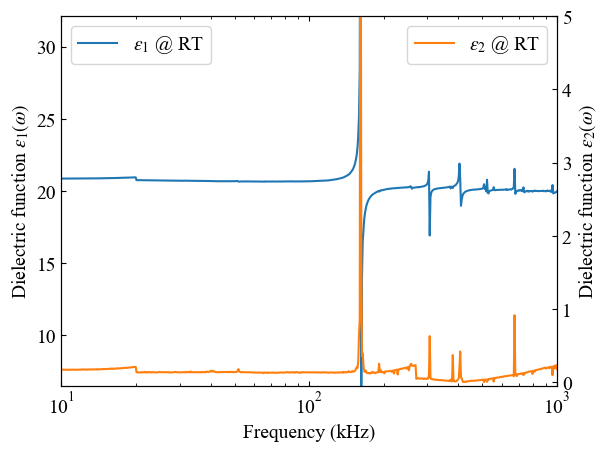

In [16]:
def plot_epsilon_log(x, y1, y2):
    f = plt.figure()
    ax1 = f.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)*9.9
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(6.5, 32.1)
    ax1.set_xscale("log")

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_1(\omega)$")
    ax1.plot(x, y1, label = "$\epsilon_1$ @ RT")
    # ax1.hlines(0, xmin, xmax, colors="black")
    ax1.legend(loc="upper left")

    ax2 = ax1.twinx()
    ax2.set_ylim(-0.05,5.0)
    ax2.set_ylabel("Dielectric function $\epsilon_2(\omega)$")
    ax2.plot(x, np.abs(y1*y2), color ="tab:orange", label = "$\epsilon_2$ @ RT")
    ax2.legend(loc="upper right")

    plt.show()

plot_epsilon_log(Frequency_RT, Epsilon1_RT, Dissipation_RT)

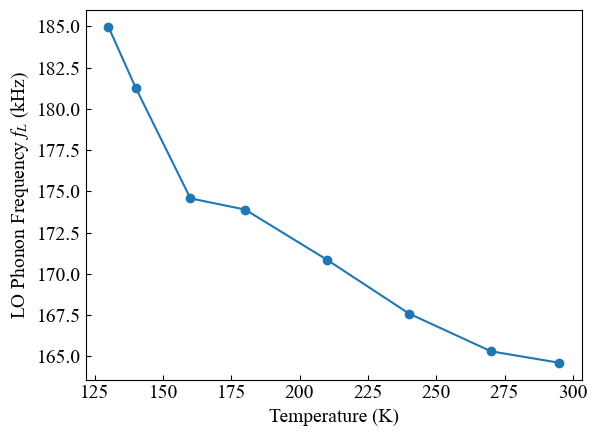

In [25]:
plt.xlabel("Temperature (K)")
plt.ylabel("LO Phonon Frequency $f_L$ (kHz)")
plt.plot(Temp, np.sqrt(Epsilon1[:,0]/Epsilon1[:,-1]) * Frequency_res1, color="tab:blue")
for i in range(8):
    plt.scatter(Temp[i], np.sqrt(Epsilon1[i][0]/Epsilon1[i][-1]) * Frequency_res1[i], color="tab:blue")